### VaR历史计算

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("PTR.csv")
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-08,39.980000,40.490002,39.169998,39.360001,36.559658,283800
1,2021-03-09,38.689999,38.889999,38.160000,38.220001,35.500767,300000
2,2021-03-10,38.599998,38.669998,38.009998,38.509998,35.770130,151600
3,2021-03-11,39.230000,39.380001,39.009998,39.250000,36.457481,197900
4,2021-03-12,39.000000,39.000000,38.639999,38.689999,35.937325,142600
5,2021-03-15,39.020000,39.680000,38.680000,39.619999,36.801159,186500


In [8]:
#计算 中石化 每天的收益率
df['d_return'] = df['Close'].pct_change()
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume,d_return
0,2021-03-08,39.980000,40.490002,39.169998,39.360001,36.559658,283800,NaN
1,2021-03-09,38.689999,38.889999,38.160000,38.220001,35.500767,300000,-0.028963
2,2021-03-10,38.599998,38.669998,38.009998,38.509998,35.770130,151600,0.007588
3,2021-03-11,39.230000,39.380001,39.009998,39.250000,36.457481,197900,0.019216
4,2021-03-12,39.000000,39.000000,38.639999,38.689999,35.937325,142600,-0.014268
5,2021-03-15,39.020000,39.680000,38.680000,39.619999,36.801159,186500,0.024037


In [9]:
VaR_5 = np.percentile(df.d_return.dropna(), 5)
VaR_1 = np.percentile(df.d_return.dropna(), 1)

In [10]:
VaR_1
#此数据表明：一年内，至少有99%的日收益率大于%-5.987

-0.05987609539703926

In [11]:
VaR_5
#此数据表明：一年内，至少有95%的日收益率大于%-3.294

-0.03294460287605421

Text(0, 0.5, 'count')

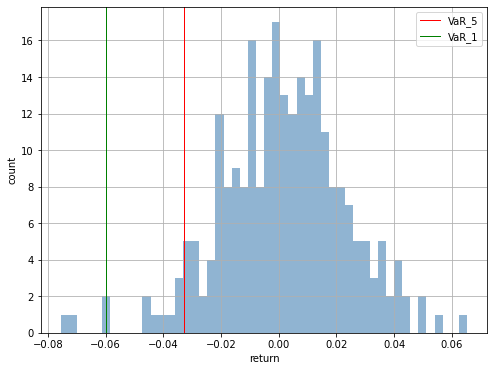

In [13]:
#作图
plt.figure(figsize=(8,6))
df.d_return.hist(bins=50, alpha=0.6, color='steelblue')
plt.axvline(VaR_5, color='red', linewidth=1, label = 'VaR_5')
plt.axvline(VaR_1, color='green', linewidth=1, label = 'VaR_1')
plt.legend()
plt.xlabel('return')
plt.ylabel('count')